In [525]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [526]:
df = pd.read_csv('/Users/gregorylontok/gd/LMU/fall2018-bi/lecture_material/data/universal_bank.csv')

In [527]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [528]:
# Set target variable
y = df['Personal Loan']

In [529]:
model_stats = {
    'model' : [],
    'accuracy' : []
}

# Logistic Regression

In [530]:
X = df[['Experience', 'Income', 'Family',
       'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]

In [531]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [532]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [533]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [534]:
logistic_regression_accuracy = metrics.accuracy_score(y_test, predictions)
model_stats['model'].append('Logistic Regression')
model_stats['accuracy'].append(logistic_regression_accuracy)
logistic_regression_accuracy

0.938

precision = specificity

precision: ability of a classification model to return only relevant instances


recall = sensitivity

recall: ability of a classification model to identify all relevant instances


F1 score: single metric that combines recall and precision using the harmonic mean


In [535]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97       438
          1       0.94      0.53      0.68        62

avg / total       0.94      0.94      0.93       500



In [536]:
print(confusion_matrix(y_test, predictions))

[[436   2]
 [ 29  33]]


In [537]:
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,436,2,438
1,29,33,62
All,465,35,500


True positives (0 - 0) = 2219

True positives: data points labeled as positive that are actually positive

---

False positives (1 - 0) = 103

False positives: data points labeled as positive that are actually negative

---

True negatives (0 - 1) = 25

True negatives: data points labeled as negative that are actually negative

---

False negative (1 - 1) = 153

False negatives: data points labeled as negative that are actually positive

In [538]:
pd.DataFrame(model.coef_, index = ['Coef'], columns = X.columns).T

,Coef
Experience,-0.001260
Income,0.038070
Family,0.309949
Education,1.024067
Securities Account,-0.753653
CD Account,3.179061
Online,-0.470673
CreditCard,-1.116677


In [539]:
import statsmodels.api as sm

model = sm.Logit(y_train, X_train).fit()
predictions = round(model.predict(X_test))

Optimization terminated successfully.
         Current function value: 0.266755
         Iterations 8


In [540]:
predictions[0:5]

1107    0.0
1509    0.0
2148    0.0
1678    0.0
153     0.0
dtype: float64

In [541]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1992
Method:                           MLE   Df Model:                            7
Date:                Tue, 27 Nov 2018   Pseudo R-squ.:                  0.1623
Time:                        19:31:10   Log-Likelihood:                -533.51
converged:                       True   LL-Null:                       -636.88
                                        LLR p-value:                 4.278e-41
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Experience            -0.0604      0.007     -8.633      0.000      -0.074      -0.047
Income                 0.0133      0.001      9.706      0.000       0.011       0.016
Family                -0.4569      0.066     -6.914      0.000      -0.586      -0.327
Education             -0.1677      0.082     -2.038      0.042      -0.329      -0.006
Securities Account    -1.6608      0.344     -4.831      0.000      -2.335      -0.987
CD Account             4.7132      0.360     13.095      0.000       4.008       5.419
Online                -1.3182      0.170     -7.772      0.000      -1.651      -0.986
CreditCard            -1.7412      0.248     -7.011      0.000      -2.228      -1.254
======================================================================================
"""

In [542]:
pd.crosstab(y_test, round(predictions), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0,419,19,438
1,43,19,62
All,462,38,500


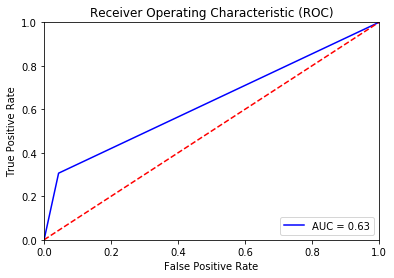

In [543]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

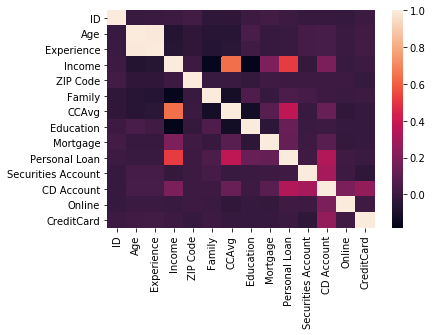

In [544]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# KNN

In [545]:
X = df[['Experience', 'Income', 'Family',
       'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]

In [546]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [547]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [548]:
predictions= model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [549]:
knn_accuracy = metrics.accuracy_score(y_test, predictions)
model_stats['model'].append('KNN')
model_stats['accuracy'].append(knn_accuracy)
knn_accuracy

0.914

In [550]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95       443
          1       0.68      0.46      0.55        57

avg / total       0.90      0.91      0.91       500



In [551]:
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,431,12,443
1,31,26,57
All,462,38,500


In [552]:
# precision = True Positives / (True Positives + False Positives)
precision_0 = 2219 / (2219 + 118)
precision_0

0.9495079161317929

In [553]:
# precision = True Positives / (True Positives + False Positives)
precision_1 = 138 / (138 + 25)
precision_1

0.8466257668711656

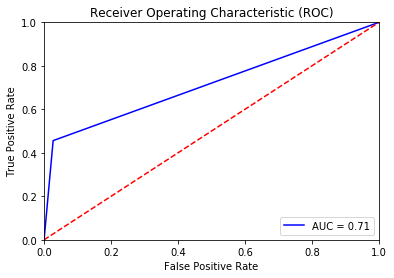

In [554]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Trees

In [555]:
X = df[['Education', 'Family', 'CD Account']]

In [556]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [557]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [558]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [559]:
decision_tree_accuracy = metrics.accuracy_score(y_test, predictions)
model_stats['model'].append('Decision Tree')
model_stats['accuracy'].append(decision_tree_accuracy)
decision_tree_accuracy

0.902

In [560]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.98      0.95       445
          1       0.64      0.25      0.36        55

avg / total       0.88      0.90      0.88       500



In [561]:
pd.crosstab(y_test, predictions, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,437,8,445
1,41,14,55
All,478,22,500


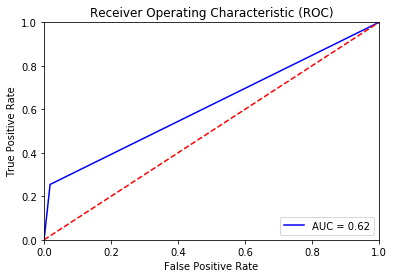

In [562]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [563]:
pd.DataFrame(model.feature_importances_, index = X.columns, columns = ['Importance']).sort_values(['Importance'], ascending = False)

,Importance
CD Account,0.547399
Education,0.254233
Family,0.198369


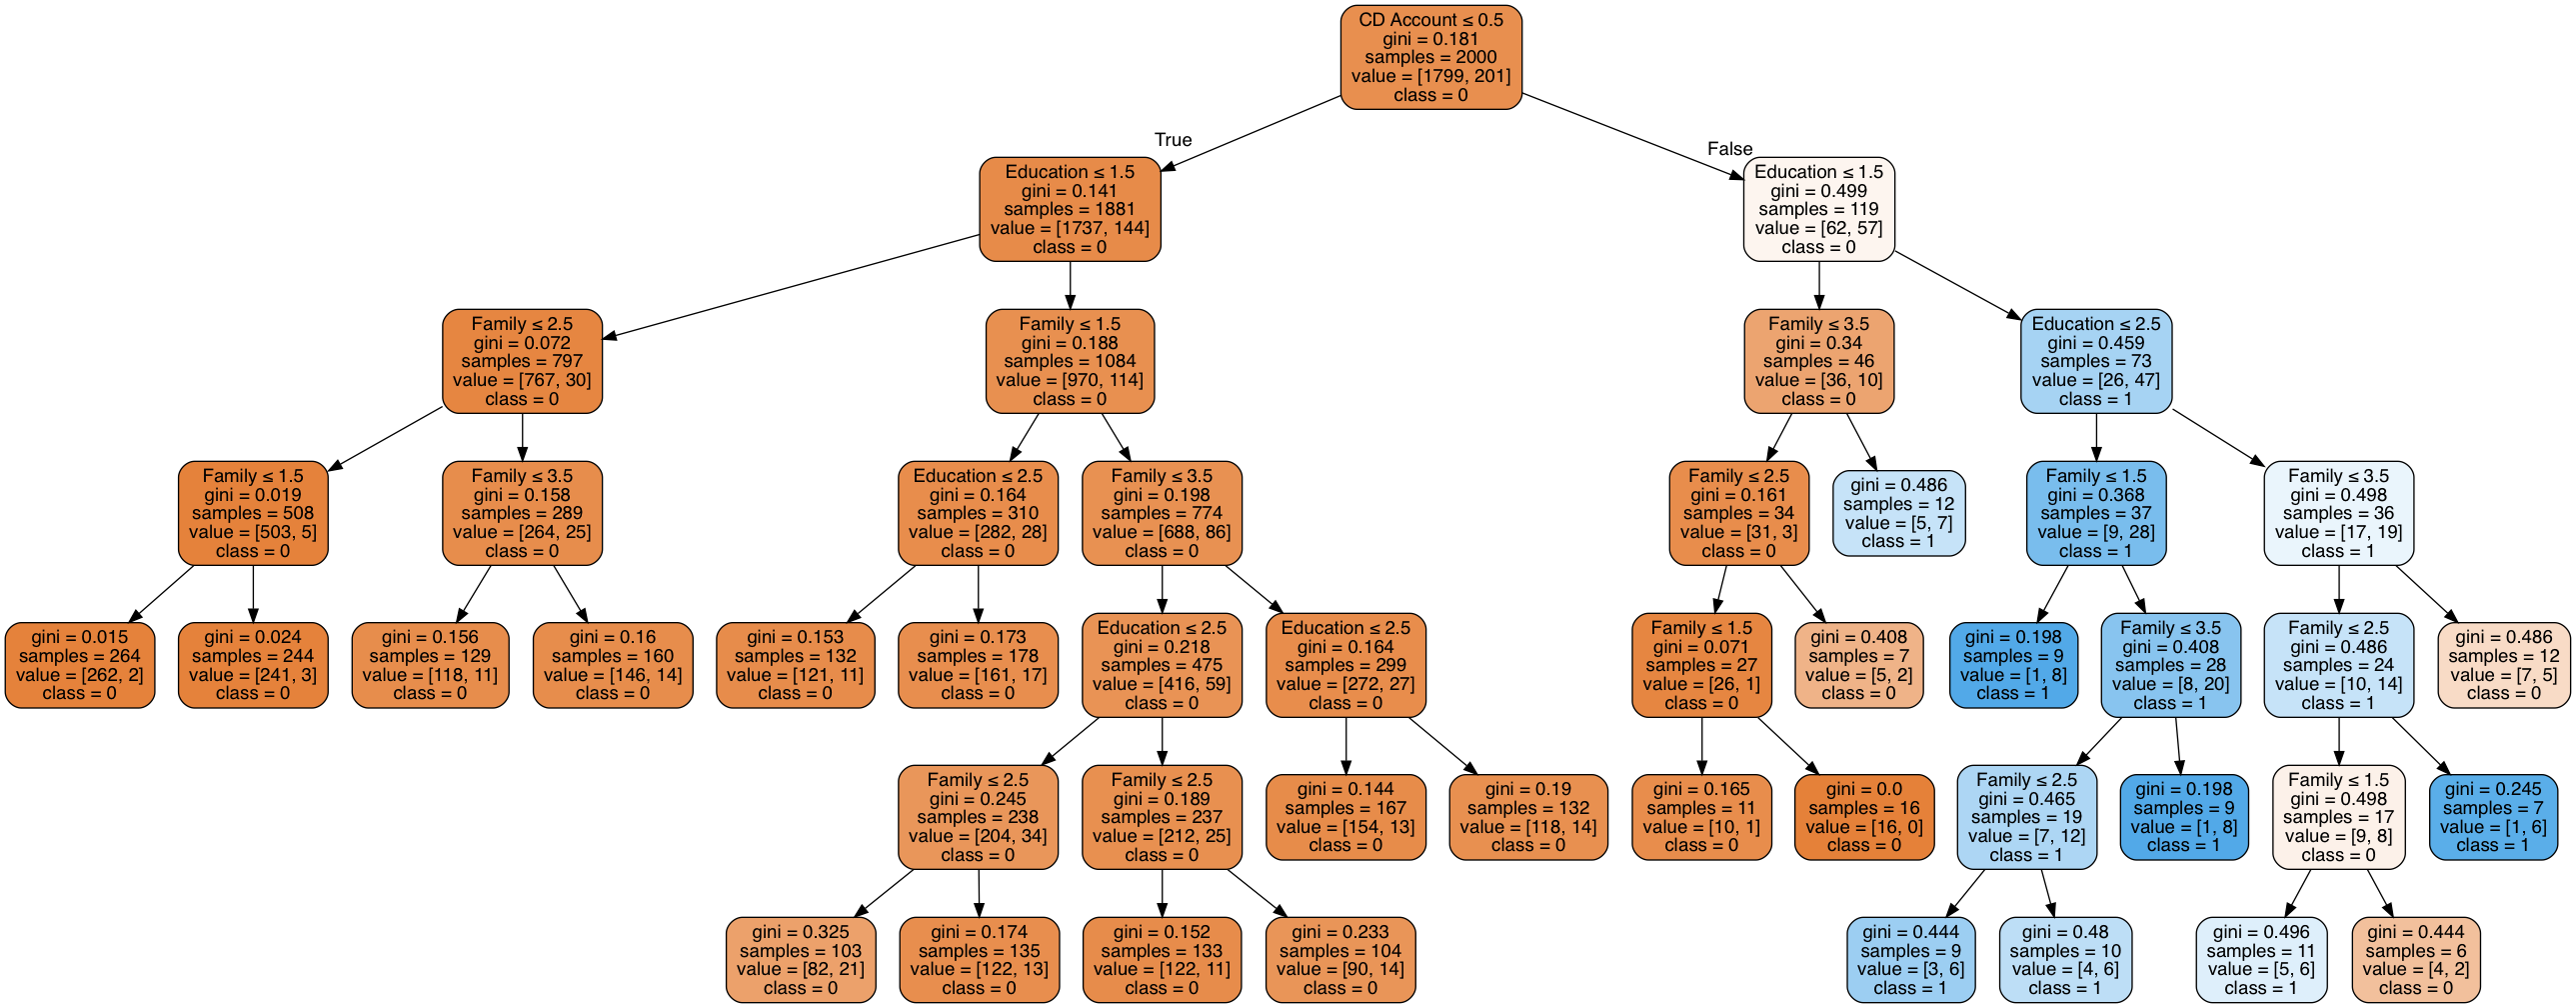

In [564]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

# only 1 tree in DecisionTreeClassifier
export_graphviz(model, out_file=dot_data,
                feature_names = X.columns, class_names = ['0','1'],
                filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Random Forest

In [565]:
X = df[['Education', 'Family', 'CD Account']]

In [566]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [567]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [568]:
# X = df[['Education', 'Family', 'CD Account']]
#predictions = model.predict([[1, 1, 0]]) # ID 10 -> PL 0
#predictions = model.predict([[2, 1, 1]]) # ID 30 -> PL 1
#predictions = model.predict([[3, 4, 1]])
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [569]:
random_forest_accuracy = metrics.accuracy_score(y_test, predictions)
model_stats['model'].append('Random Forest')
model_stats['accuracy'].append(random_forest_accuracy)
random_forest_accuracy

0.904

In [570]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95       444
          1       0.79      0.20      0.31        56

avg / total       0.89      0.90      0.88       500



In [571]:
pd.crosstab(y_test, predictions, rownames = ['True'], colnames = ['Predictions'], margins = True)

Predictions,0,1,All
True,,,
0,441,3,444
1,45,11,56
All,486,14,500


In [572]:
pd.DataFrame(model.feature_importances_, index = X.columns, columns = ['Importance']).sort_values(['Importance'], ascending = False)

,Importance
CD Account,0.661356
Education,0.207476
Family,0.131169


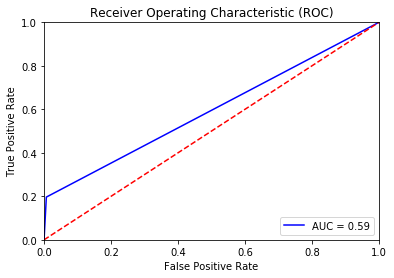

In [573]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [574]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## Tree 01

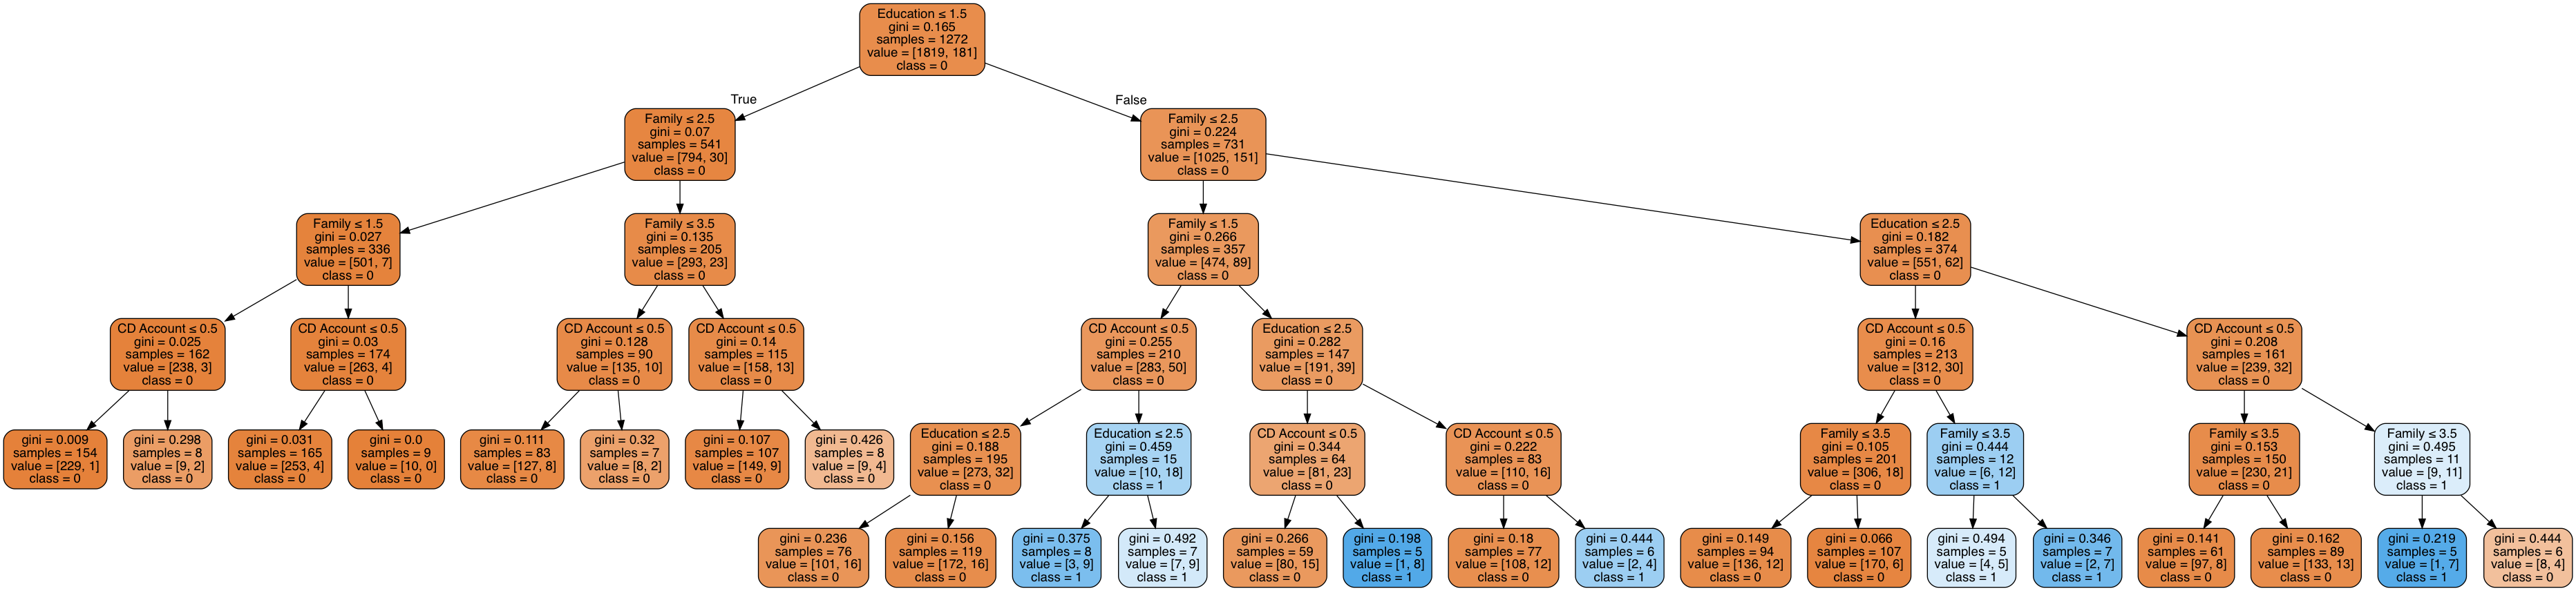

In [575]:
dot_data = StringIO()

estimator = model.estimators_[0]

export_graphviz(estimator, out_file=dot_data,  feature_names = X.columns, class_names = ['0','1'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Tree 02

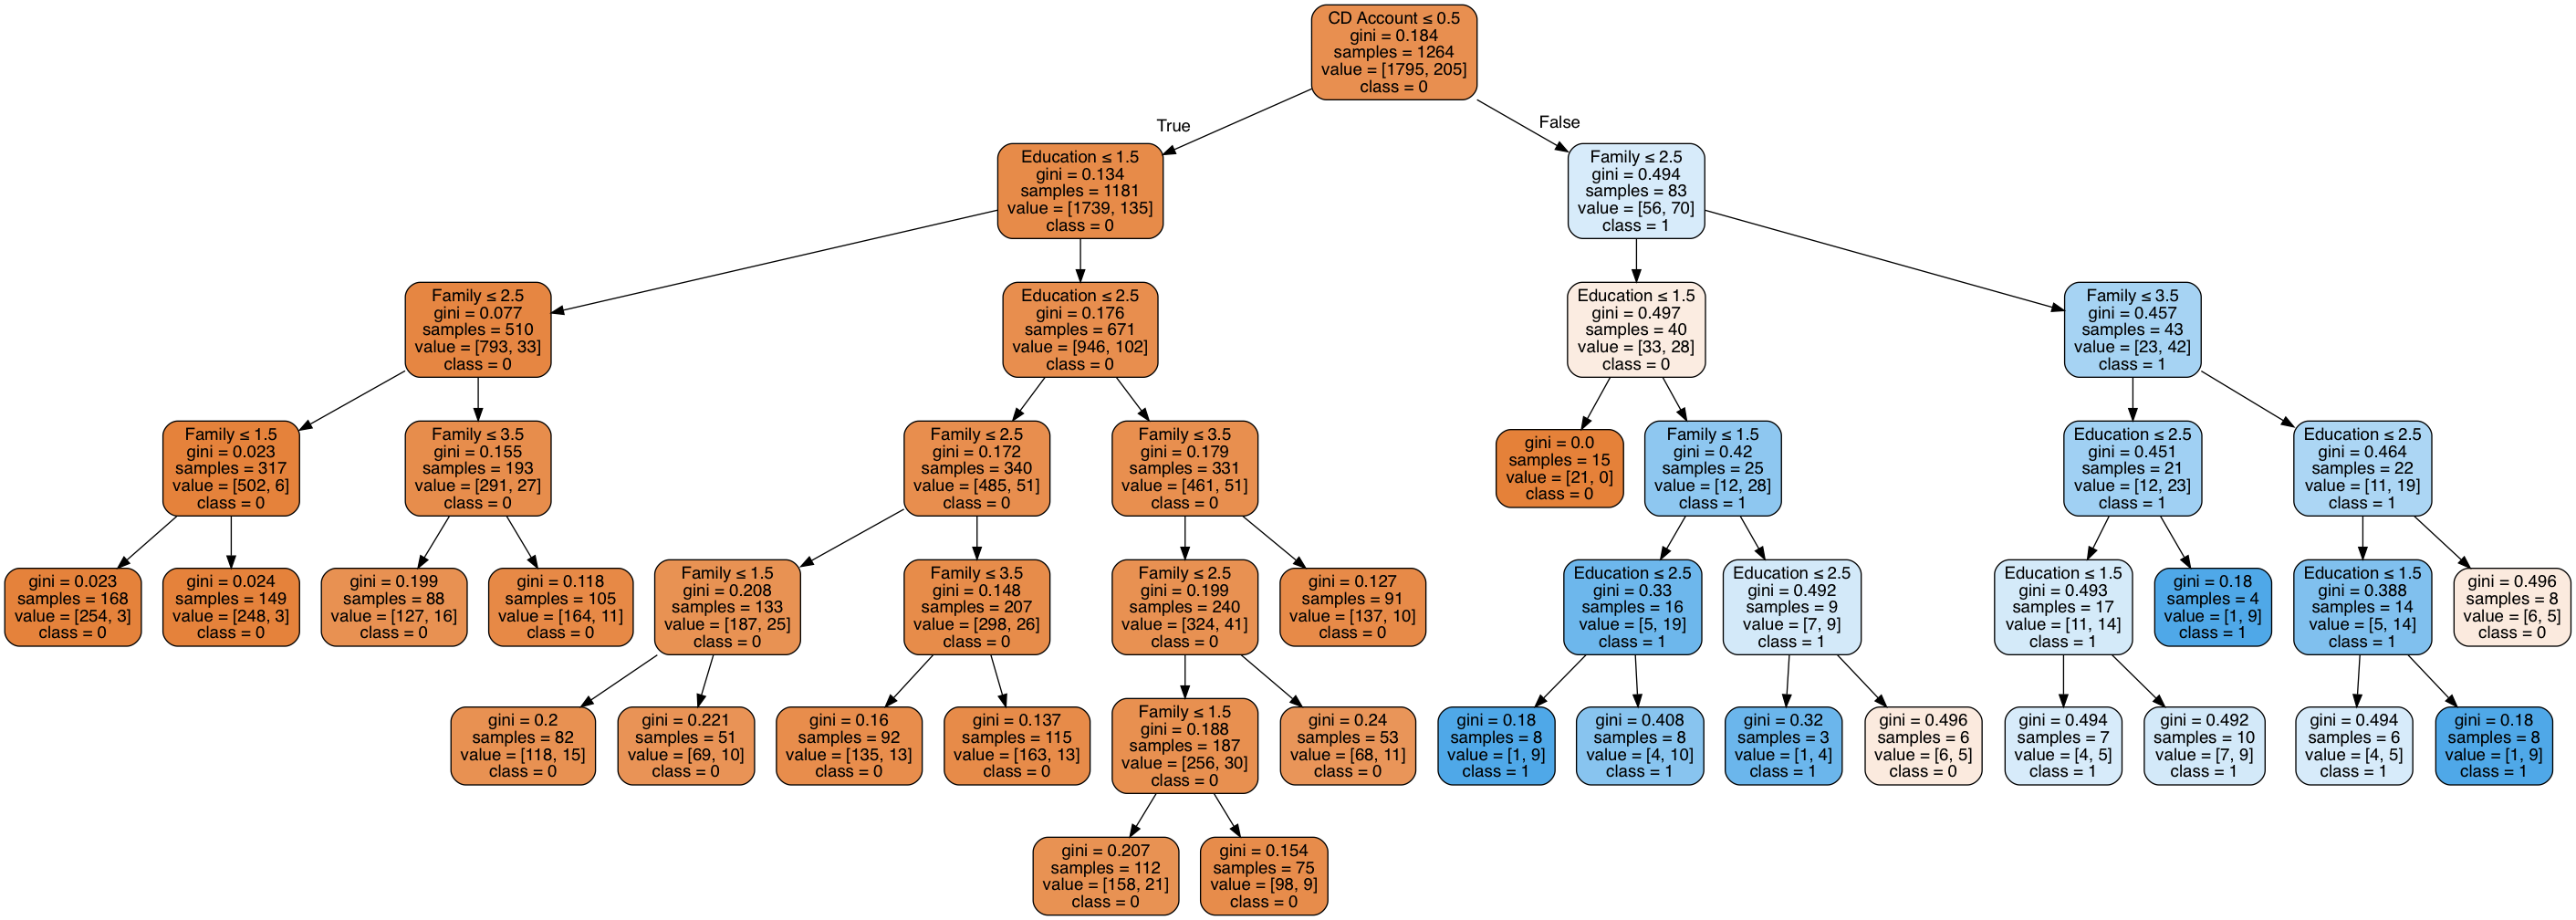

In [576]:
dot_data = StringIO()
estimator = model.estimators_[1]

export_graphviz(estimator, out_file=dot_data,  feature_names = X.columns, class_names = ['0','1'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Tree 03

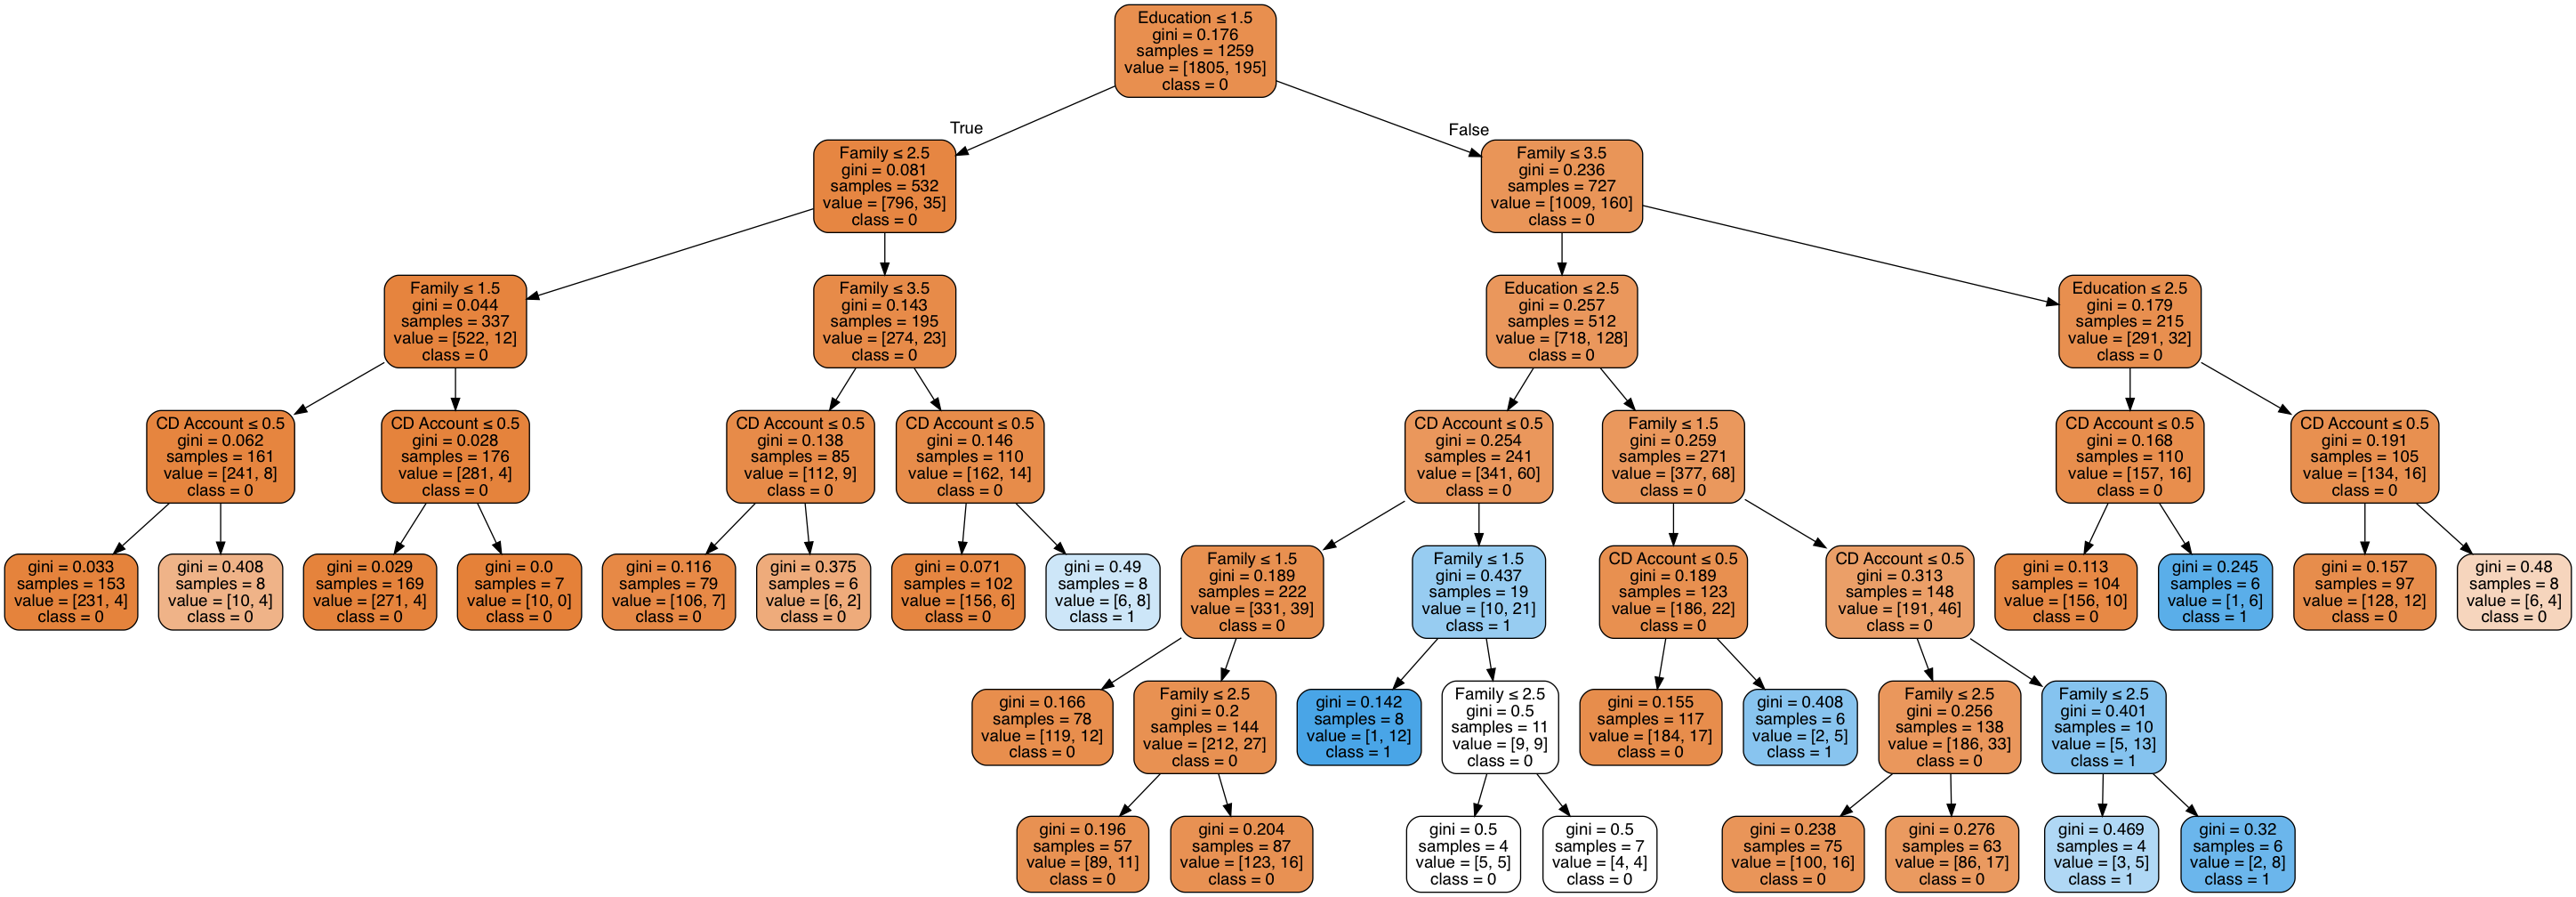

In [577]:
dot_data = StringIO()
estimator = model.estimators_[2]

export_graphviz(estimator, out_file=dot_data,  feature_names = X.columns, class_names = ['0','1'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [578]:
model_stats_df = pd.DataFrame(model_stats)
model_stats_df

,model,accuracy
0,Logistic Regression,0.938
1,KNN,0.914
2,Decision Tree,0.902
3,Random Forest,0.904


### Features

- Logistic Regression
- K-nearest Neighbors
```python
X = df[['Experience', 'Income', 'Family',
       'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]
```

- Decision Tree
- Random Forest
```python
X = df[['Education', 'Family', 'CD Account']]
```